In [1]:
#Selecting rainfall data 
#import libraries
import boto3
import json
import urllib.request
import iris

In [2]:
#connect to sqs 
sqs = boto3.client('sqs', region_name='eu-west-2')

In [2]:
#create an empty set to hold files
rainfall_rate = set()

In [20]:
#Function that extracts filenames i.e. key from Messages and stores in a set
def sqsfunc():
    messages = sqs.receive_message(
    QueueUrl='https://sqs.eu-west-2.amazonaws.com/443602378074/MyQueueNew',
    MaxNumberOfMessages=10)
    for i in messages['Messages']:
        x = json.loads(i['Body'])
        y = json.loads(x['Message'])
        if y['name'] == "rainfall_rate":
            rainfall_rate.add(y["key"])
        return rainfall_rate

In [21]:
#checking len of set
len(rainfall_rate)

0

In [1]:
#downloading 5 files at a time
def download_data_object(rainfall_rate):
    while(len(rainfall_rate) <=5):
        sqsfunc()
    for i in rainfall_rate:
        url = "https://s3.eu-west-2.amazonaws.com/" + "aws-earth-mo-atmospheric-mogreps-uk-prd" + "/" + i
        urllib.request.urlretrieve(url, i)
#additionally files can be downloaded to i.e. moved/copied to s3 storage


In [31]:
download_data_object(rainfall_rate)

In [24]:
rainfall_rate

{'04236c715d30c4bcd6fff1d8b71adbff15dbfecf.nc',
 '12c24e0a8b0d830f8bd4ea2025208c25b7da22bd.nc',
 '2f336732e71fc80ba31372b7a5fbaf9c7cd9bf00.nc',
 '355cc3ff2092997dbbf816ec7ee01a6372445ac8.nc',
 '59b11627481d23dcf73b8a39d01489b92ae56473.nc'}

In [32]:
rainfall_rate = list(rainfall_rate)

In [33]:
rainfall_rate

['04236c715d30c4bcd6fff1d8b71adbff15dbfecf.nc',
 '2f336732e71fc80ba31372b7a5fbaf9c7cd9bf00.nc',
 '59b11627481d23dcf73b8a39d01489b92ae56473.nc',
 '355cc3ff2092997dbbf816ec7ee01a6372445ac8.nc',
 '12c24e0a8b0d830f8bd4ea2025208c25b7da22bd.nc']

In [36]:
for i in rainfall_rate[0:len(rainfall_rate)]:
    filename = i
    listofcubes = iris.load(filename)
    cube = listofcubes[0]
    print("--filename: " + i)
    print("--listofcubes in file: \n" ,listofcubes,end="\n--Printing Cube now\n")
    realization = cube.coord('realization').points
    print("realization: " ,realization)

--filename: 04236c715d30c4bcd6fff1d8b71adbff15dbfecf.nc
--listofcubes in file: 
 0: rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
--Printing Cube now
realization:  [6 7 8]
--filename: 2f336732e71fc80ba31372b7a5fbaf9c7cd9bf00.nc
--listofcubes in file: 
 0: rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
--Printing Cube now
realization:  [6 7 8]
--filename: 59b11627481d23dcf73b8a39d01489b92ae56473.nc
--listofcubes in file: 
 0: rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
--Printing Cube now
realization:  [6 7 8]
--filename: 355cc3ff2092997dbbf816ec7ee01a6372445ac8.nc
--listofcubes in file: 
 0: rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
--Printing Cube now
realization:  [6 7 8]
--filename: 12c24e0a8b0d830f8bd4ea202520

In [37]:
import matplotlib.pyplot as plt
import iris.quickplot as qplt
#Plotting one by one for each realization

In [40]:
#function that takes list of files and desired number of files
def plotting_rain(rainfall_rate,n):
    for i in rainfall_rate[0:n]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        realization = cube.coord('realization').points
        for i in realization:
            extracted_cube = cube.extract(iris.Constraint(realization=i))
            qplt.pcolormesh(extracted_cube,cmap='RdBu_r')
            plt.gca().coastlines()
            plt.show()

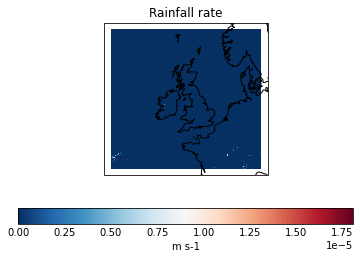

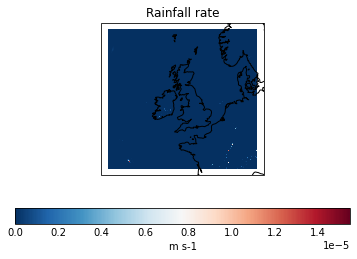

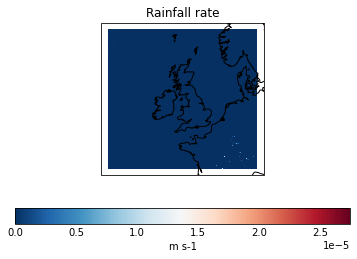

In [41]:
plotting_rain(rainfall_rate,1)

In [104]:
#countour plot
#function that takes list of files and desired number of files
def plotting_rain(rainfall_rate,n):
    for i in rainfall_rate[0:n]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        realization = cube.coord('realization').points
        for i in realization:
            extracted_cube = cube.extract(iris.Constraint(realization=i))
            qplt.contourf(extracted_cube, 25,cmap='GnBu_r')
            plt.gca().coastlines()
            plt.show()

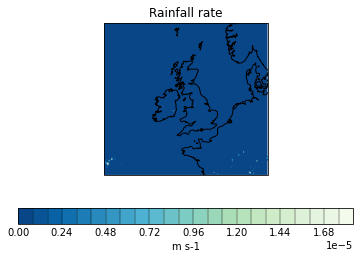

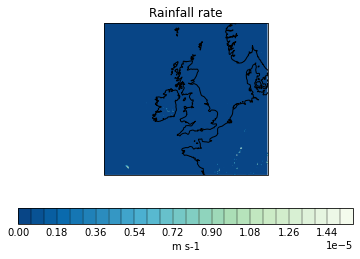

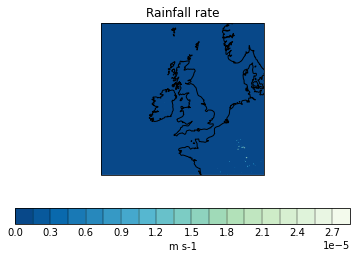

In [105]:
plotting_rain(rainfall_rate,1)

In [106]:
#countor plot
#function that takes list of files and desired number of files
def plotting_rain(rainfall_rate,n):
    for i in rainfall_rate[0:1]:
        filename = i
        listofcubes = iris.load(filename)
        cube = listofcubes[0]
        realization = cube.coord('realization').points
        for i in realization:
            extracted_cube = cube.extract(iris.Constraint(realization=i))
            contour = qplt.contour(extracted_cube,cmap='BrBG')
            plt.gca().coastlines()
            plt.clabel(contour, inline=False)
            plt.show()
    
    

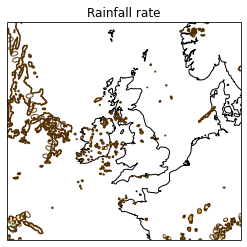

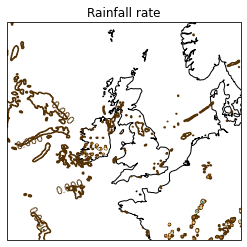

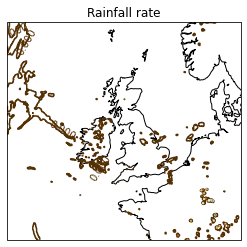

In [107]:
plotting_rain(rainfall_rate,1)

In [108]:
print(cube)

rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
     Dimension coordinates:
          realization                           x                           -                             -
          projection_y_coordinate               -                           x                             -
          projection_x_coordinate               -                           -                             x
     Scalar coordinates:
          forecast_period: 108900 seconds
          forecast_reference_time: 2020-09-15 07:00:00
          time: 2020-09-16 13:15:00
     Attributes:
          Conventions: CF-1.5, UKMO-1.0
          history: 2020-09-15T09:03:21Z: StaGE Decoupler
          institution: Met Office
          least_significant_digit: 9.0
          mosg__forecast_run_duration: PT126H
          mosg__grid_domain: uk_extended
          mosg__grid_type: standard
          mosg__grid_version: 2.2.0
          mosg__model_configur

In [111]:
realization = cube.coord('realization').points
projection_y = cube.coord('projection_y_coordinate').points
projection_x = cube.coord('projection_x_coordinate').points
print(realization[0:],
projection_y[0:5],
projection_x[0:5])

[6 7 8] [-1036000. -1034000. -1032000. -1030000. -1028000.] [-1158000. -1156000. -1154000. -1152000. -1150000.]


In [112]:
from iris.pandas import as_cube, as_series, as_data_frame
extracted_cube1 = cube.extract(iris.Constraint(realization=6))
df1 = as_data_frame(extracted_cube1)
extracted_cube2 = cube.extract(iris.Constraint(realization=7))
df2 = as_data_frame(extracted_cube2)
extracted_cube3 = cube.extract(iris.Constraint(realization=8))
df3 = as_data_frame(extracted_cube3)

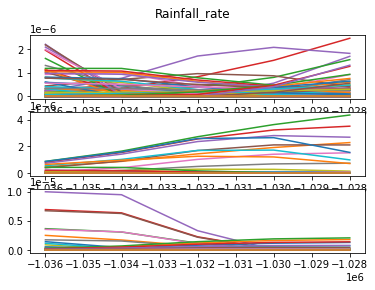

In [113]:
fig,axs = plt.subplots(3)
fig.suptitle('Rainfall_rate')
axs[0].plot(df1.head())
axs[1].plot(df2.head())
axs[2].plot(df3.head())
plt.show()

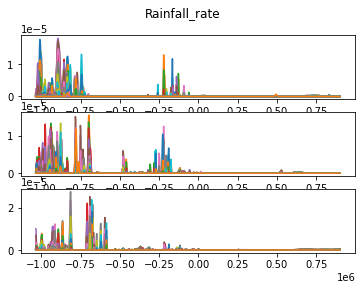

In [114]:
#or
fig,axs = plt.subplots(3)
fig.suptitle('Rainfall_rate')
axs[0].plot(df1)
axs[1].plot(df2)
axs[2].plot(df3)
plt.show()

In [ ]:
import numpy as np
from mpl_toolkits.basemap import Basemap, cm

df = pd.read_csv('data.csv', usecols=[1,2,4])
df = df.apply(pd.to_numeric)

val_pivot_df = df.pivot(index='Latitude', columns='Longitude', values='Bin 1')

lons = val_pivot_df.columns.astype(float)
lats = val_pivot_df.index.astype(float)

fig, ax = plt.subplots(1, figsize=(8,8))

m = Basemap(projection='merc',
        llcrnrlat=df.dropna().min().Latitude-5
        , urcrnrlat=df.dropna().max().Latitude+5
        , llcrnrlon=df.dropna().min().Longitude-5
        , urcrnrlon=df.dropna().max().Longitude+5
        , resolution='i', area_thresh=10000
        )
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.fillcontinents(color='gray', lake_color='white')
m.drawmapboundary(fill_color='0.3')

x, y = np.meshgrid(lons,lats)
px,py = m(x,y)
data_values = val_pivot_df.values
masked_data = np.ma.masked_invalid(data_values)
cmap = plt.cm.viridis
m.pcolormesh(px, py, masked_data, vmin=0, vmax=8000)
m.colorbar()

plt.show()